<a href="https://colab.research.google.com/github/vishalrana00007/Netflix-Movies-And-TV-Shows-Machine-Learning-Capstone-Project/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_MACHINE_LEARNING_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - NETFLIX MOVIES AND TV SHOWS CLUSTERING**

**Project Type** - Unsupervised Learning and Recommendation System.

**Contribution** - Individual: VISHAL RANA

# **Project Summary**

In this project, I will develop an Unsupervised Machine Learning model to cluster and analyze a dataset containing information about Netflix shows and movies. The dataset consists of 7787 rows and 12 columns, including features such as **show_id, type, title, cast, country, date added, release_year, rating, duration, listed_in, and description**.

The primary objectives of this project are as follows:

**Data Exploration and Visualization**: Begin by thoroughly exploring and understanding the dataset. Utilize various visualization techniques to extract meaningful insights. Charts and graphs will be generated to illustrate trends and patterns in Netflix content, aiding in hypothesis formulation.

**Hypothesis Testing**: Based on the visualizations, formulate hypotheses about the dataset. Test these hypotheses rigorously to validate assumptions and gain deeper insights into the data.

**Data Preprocessing**: Handle missing values, null entries, and outliers to ensure data quality and integrity. Address any imbalanced data issues by applying appropriate techniques for balancing the dataset.

**Feature Selection and Engineering**: Identify and select relevant features for model training. Conduct feature engineering if necessary to enhance model performance.

**Model Development and Evaluation**: Utilize unsupervised learning techniques such as clustering algorithms to group similar Netflix shows and movies together based on their attributes. Evaluate the performance of the clustering model and interpret the results.

**Final Insights and Recommendations**: Draw conclusions from the analysis and clustering results. Provide insights and recommendations for content creators and viewers based on the identified patterns and clusters within the Netflix dataset.

This project will involve a comprehensive workflow from data exploration to model deployment, aiming to uncover hidden patterns and structures in the Netflix dataset using advanced unsupervised machine learning techniques. The ultimate goal is to deliver actionable insights and knowledge that can inform decision-making and improve content discovery on the Netflix platform.

# **GitHub Link -**

https://github.com/vishalrana00007/Netflix-Movies-And-TV-Shows-Machine-Learning-Capstone-Project

# **Problem Statement -**

This project delves into a treasure trove of information: a dataset capturing the TV shows and movies available on Netflix in 2019. The data originates from Flixable, a third-party search engine for Netflix content.

Intriguingly, a 2018 report revealed a fascinating trend: the number of TV shows on Netflix has skyrocketed nearly threefold since 2010! Conversely, the movie library has shrunk by over 2,000 titles during the same period. This shift begs the question: is Netflix strategically prioritizing television content?

But this dataset holds the potential to unlock far more than just that. By embarking on a voyage of exploratory data analysis (EDA) and Clustering similar content by matching text-based features, we can uncover a wealth of insights:

Global Content Landscape: We can explore the diverse range of content available in different countries, revealing Netflix's approach to catering to regional preferences.

Shifting Focus? We can delve deeper into the trend of TV show proliferation, analyzing if Netflix is indeed prioritizing TV content over movies.

Content Similarities: By harnessing the power of text analysis, we can cluster similar shows and movies based on their descriptions, uncovering hidden connections and thematic trends within the Netflix library.

Furthermore, by integrating this dataset with external sources like IMDB ratings and Rotten Tomatoes scores, we can paint an even richer picture. Imagine – we could identify not just the quantity, but also the quality and popularity of content available in different regions and formats.

This project promises an exciting journey into the ever-evolving world of Netflix content. Let's embark on this exploration and uncover the hidden gems within this treasure trove of data!

# ***Let's Begin !***

# ***1.Know Your Data***

**Importing Libraries**

In [25]:
# Import Libraries
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer
from google.colab import drive
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_samples,silhouette_score

import warnings
warnings.filterwarnings('ignore')

**Dataset Loading**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_location = '/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
netflix_df = pd.read_csv(file_location, encoding = 'ISO-8859-1')


**Dataset first view**

In [4]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


**Inspecting Dataframe**

In [6]:
num_rows, num_columns = netflix_df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 7787
Number of columns: 12


In [7]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Duplicate values**

In [9]:
duplicate_count = netflix_df.duplicated().sum()

print("Number of duplicate values:", duplicate_count)

Number of duplicate values: 0


**Checking null values**

In [10]:
# Missing Values/Null Values Count
missing_values_count = netflix_df.isnull().sum()

print(missing_values_count)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


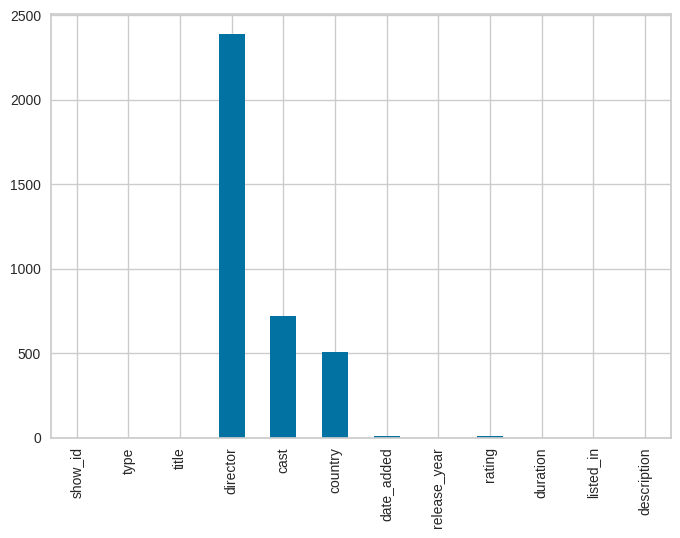

In [11]:
#Visualizing missing values
netflix_df.isnull().sum().plot.bar()
plt.show()

<Axes: >

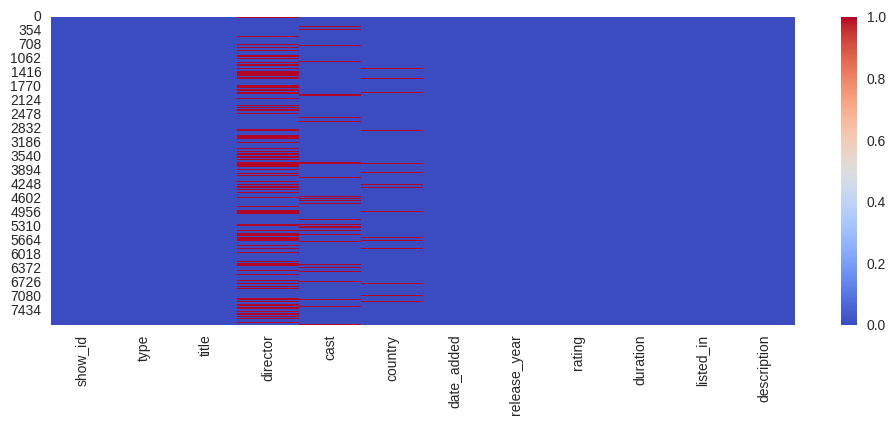

In [14]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(netflix_df.isna(), cmap = 'coolwarm')

**Conclusion:** Netflix dataset has 7787 rows and 12 columns.There is no duplicate values but there are missing values in director,cast,country,date_added and ratings columns with highest in director column.

# ***2.Understanding Variables***

In [12]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
netflix_df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"RaÃºl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


**Variables Description**

**show_id** : Unique ID for every Movie/Show

**type** : Identifier - Movie/Show

**title** : Title of the Movie/Show

**director** : Director of the Movie/Show

**cast** : Actors involved in the Movie/Show

**country** : Country where the Movie/Show was produced

**date_added**: Date it was added on Netflix

**release_year** : Actual Release year of the Movie/Show

**rating** : TV Rating of the Movie/Show

**duration** : Total Duration - in minutes or number of seasons

**listed_in** : Genre

**description** : The Summary description

**Unique Values**

In [17]:
# Check Unique Values for each variable.
for i in netflix_df.columns.tolist():
  print("No. of unique values in",i,"is",netflix_df[i].nunique())

No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


**Conclusion**: I am focusing on several key columns of the dataset, including 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description', as they contain a wealth of information.

By utilizing these features, I plan to create a cluster column and implement both K-means and Hierarchical clustering algorithms.
Additionally, we will be developing a content-based recommendation system that utilizes the information from these columns to provide personalized suggestions to users.

 This approach will allow me to gain valuable insights and group similar data points together, as well as provide personalized recommendations based on user preferences and viewing history.

# ***3.Exploratory Data Analysis(EDA)***

What is EDA?

EDA stands for Exploratory Data Analysis. It is a process of analyzing and understanding the data, which is an essential step in the data science process. The goal of EDA is to gain insights into the data, identify patterns, and discover relationships and trends. It is an iterative process that helps to identify outliers, missing values, and any other issues that may affect the analysis and modeling of the data.

**4.1 Column: 'type'**

In [19]:
# number of values of different categories in 'type'
netflix_df['type'].value_counts()

type
Movie      5377
TV Show    2410
Name: count, dtype: int64

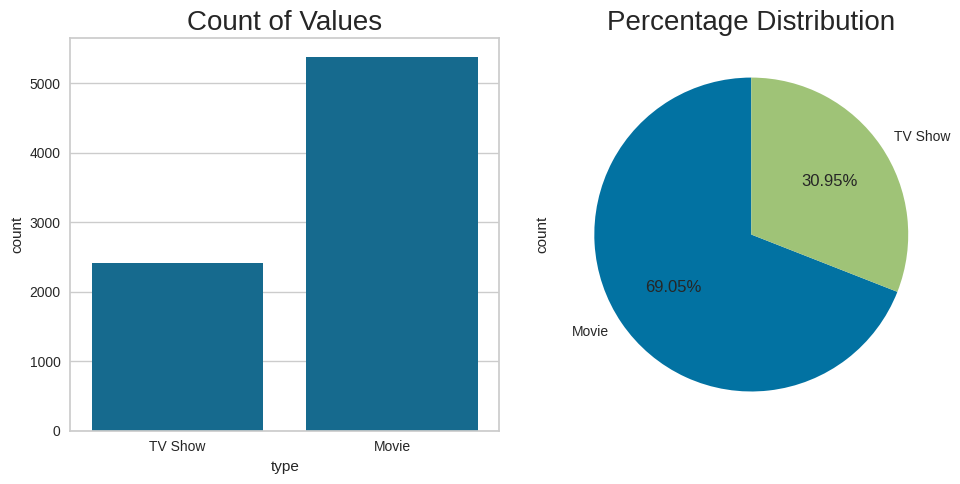

In [22]:
fig,ax = plt.subplots(1,2, figsize=(10,5))

# countplot
graph = sns.countplot(x = 'type', data = netflix_df, ax=ax[0])
graph.set_title('Count of Values', size=20)

# piechart
netflix_df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(10,5),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()

**Conclusion:** The above charts reveals a clear preference for movies on Netflix! Movies take center stage, constituting a substantial 69% of the available content. While TV shows hold their own at 31%, it's evident that movies currently dominate the Netflix library.


**4.2 Column: 'title'**

In [23]:
# number of unique values
netflix_df['title'].nunique()

7787

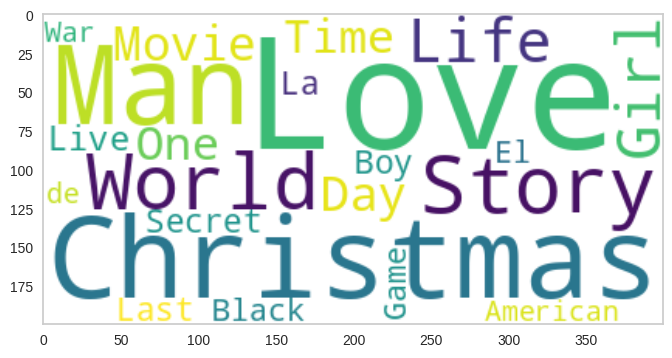

In [27]:
# text documents
text = " ".join(word for word in netflix_df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.grid(False)
plt.show()

**Conclusion:** The wordcloud of Netflix titles unveils some fascinating trends! Words like "Man," "Love," "World," "Story," "Girl," and "Christmas" emerge as recurring themes. These recurring terms hint at the captivating narratives, universal themes, and emotional journeys that resonate with viewers.

**4.3 Column: 'director'**

In [28]:
print(f'number of unique directors : {netflix_df.director.nunique()}')
print(f'null values in the column : {netflix_df.director.isna().sum()}')

number of unique directors : 4049
null values in the column : 2389


In [30]:
print(f"Number of TV shows directed by directors are : {netflix_df[netflix_df['type']=='TV Show']['director'].value_counts().sum()}")
print(f"Number of Movies directed by directors are : {netflix_df[netflix_df['type']=='Movie']['director'].value_counts().sum()}")

Number of TV shows directed by directors are : 184
Number of Movies directed by directors are : 5214


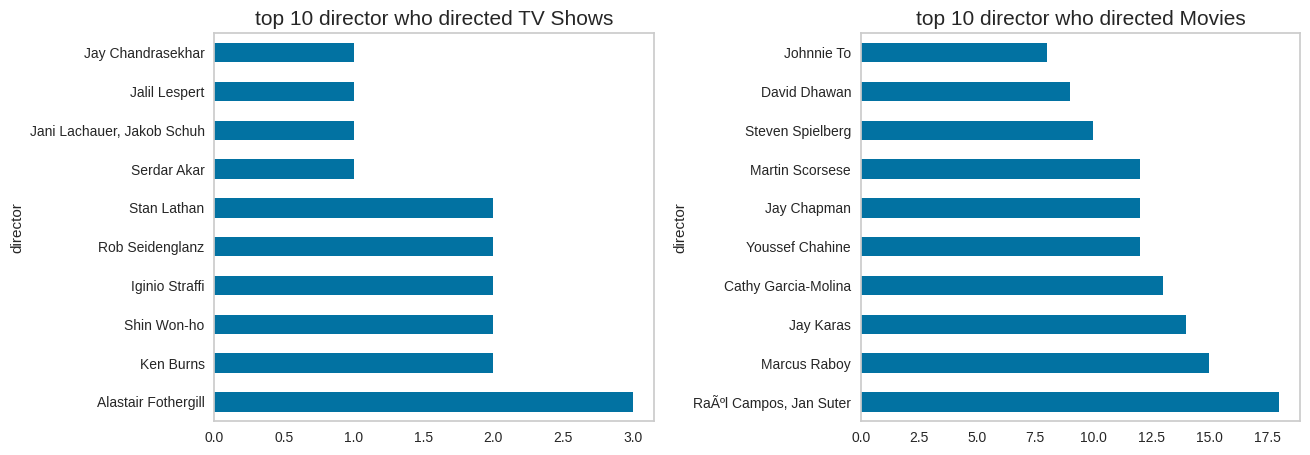

In [35]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 directors who directed TV shows
tv_shows = netflix_df[netflix_df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
tv_shows.set_title('top 10 director who directed TV Shows', size=15)
tv_shows.grid(False)

# top 10 directors who directed Movies
movies = netflix_df[netflix_df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('top 10 director who directed Movies', size=15)
movies.grid(False)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

**Conclusion:** While Alastair Fothergill's directed shows rank highest on the list, Jan Suter and Raul Campos emerge as the most frequent directors overall, each having directed 18 films. This information can be valuable for further analysis.  We could delve deeper into the genres or critical reception of these directors' films to understand their impact and filmmaking styles.

**4.4 Column: 'cast'**

In [36]:
netflix_df['cast']

0       JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...
1       DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                  NaN
Name: cast, Length: 7787, dtype: object

In [37]:
# seperating actors from cast column
cast = netflix_df['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Name: count, Length: 32881, dtype: int64

In [38]:
print(f"Number of TV Shows actors: {len(netflix_df[netflix_df['type']=='TV Show']['cast'].str.split(', ',expand=True).stack().value_counts())}")
print(f"Number of Movies actors: {len(netflix_df[netflix_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().value_counts())}")

Number of TV Shows actors: 13585
Number of Movies actors: 23049


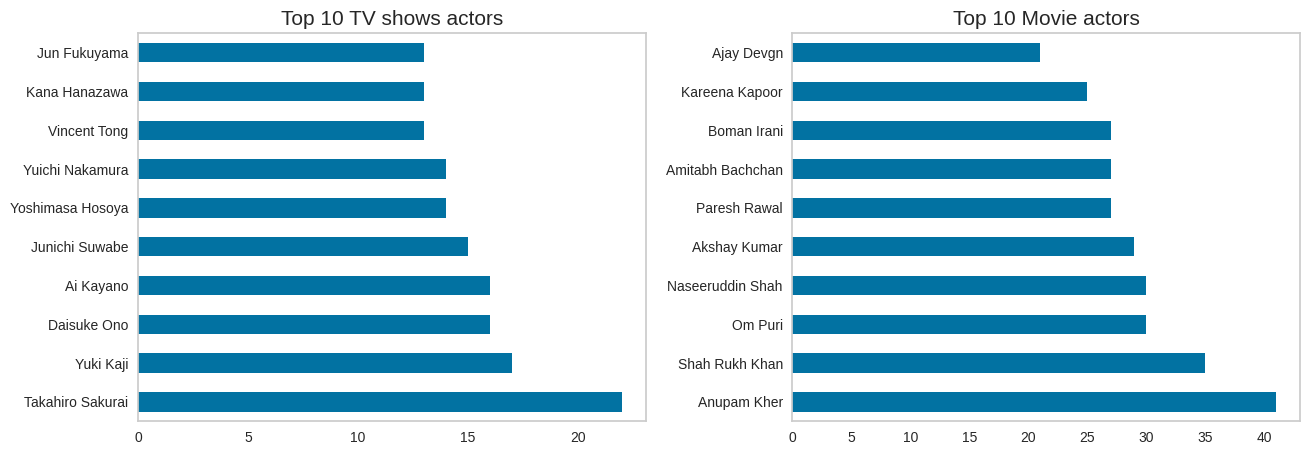

In [40]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = netflix_df[netflix_df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)
a.grid(False)

# seperating movie actor from cast column
top_movie_actor = netflix_df[netflix_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)
b.grid(False)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

**Conclusion:** The above graphs shine a spotlight on the talented actors who bring these movies and shows to life! On the movie front, the data reveals a trio of leading men: Anupam Kher, Shahrukh Khan, and Om Puri. Their frequent appearances suggest they are highly sought-after actors in the film industry.

Meanwhile, the realm of television series boasts its own stellar cast. Takahiro Sakurai, Yuki Kaji, and Daisuke Ono emerge as the most prolific actors, lending their voices to numerous shows. This insight might be particularly interesting for fans of anime or animated content, where voice acting plays a crucial role.

By understanding the actors who consistently grace our screens, we gain a deeper appreciation for the talent that fuels the entertainment industry.